<a href="https://colab.research.google.com/github/CastleJH/Music-To-Dance/blob/main/mel_spec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torchaudio
import torchaudio.transforms as transforms

def AudioToMelSpectrogram(waveform, sample_rate, target_frame=1800):
  assert waveform.dim() == 1
  
  n_fft = (waveform.size(0) // target_frame) * 2
  mel_spec = transforms.MelSpectrogram(sample_rate=sample_rate, n_fft = n_fft)(waveform)
  
  assert mel_spec.size(1) >= target_frame

  mel_spec = mel_spec[:, :target_frame]
  mel_spec_db = transforms.AmplitudeToDB()(mel_spec)

  #print(mel_spec.shape, mel_spec_db.shape)

  return mel_spec_db

In [12]:
import IPython.display as ipd

# Load the audio file
file_path = "Lee_Chaeyeon_Knock.wav"
waveform, sample_rate = torchaudio.load(file_path)

if waveform.size(0) > 1:
  waveform = waveform.mean(dim=0)

In [13]:
ipd.display(ipd.Audio(waveform, rate=sample_rate))

In [14]:
mel_spectrogram_db = AudioToMelSpectrogram(waveform, sample_rate)

/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (368) may be set too low.
  warnings.warn(


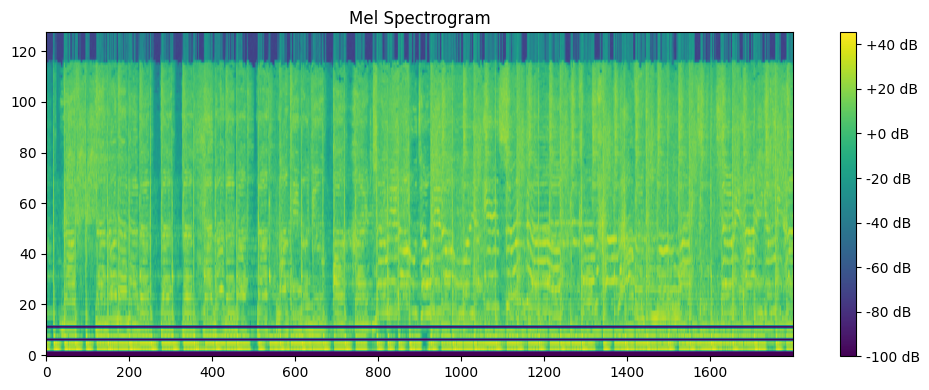

In [16]:
import matplotlib.pyplot as plt

# Plot the mel spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram_db.numpy(), origin='lower', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()